In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import yaml


In [2]:
try:
    with open ("../config.yaml", 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error reading the config file')

In [3]:
data = pd.read_csv(config['data']+'data_cleaned.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,other,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,other,E10,0,0,0,0.0,no
2,11.2,5.5,38,21.5,15,other,E10,0,0,0,0.0,no
3,12.9,3.9,36,21.5,14,other,E10,0,0,0,0.0,no
4,18.5,4.5,46,21.5,15,other,E10,0,0,0,0.0,no


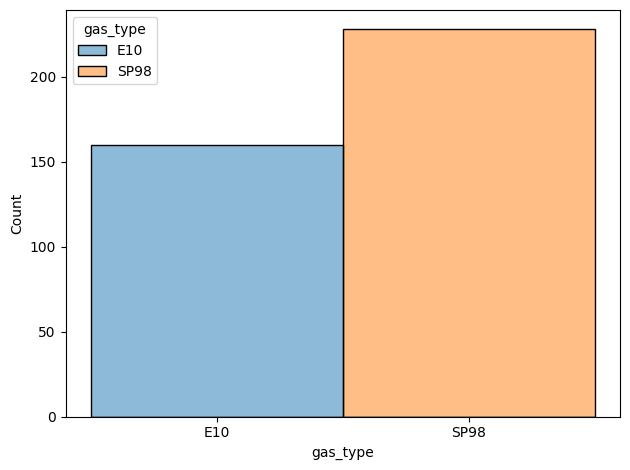

In [4]:
sns.histplot(data, x = 'gas_type', hue='gas_type')
plt.tight_layout()
plt.show()

We have more data for the SP98 so we will be dealing with class imbalance.

In [5]:
data['refill_gas'].value_counts()

no      375
SP98      8
E10       5
Name: refill_gas, dtype: int64

The refilling is quite balanced.

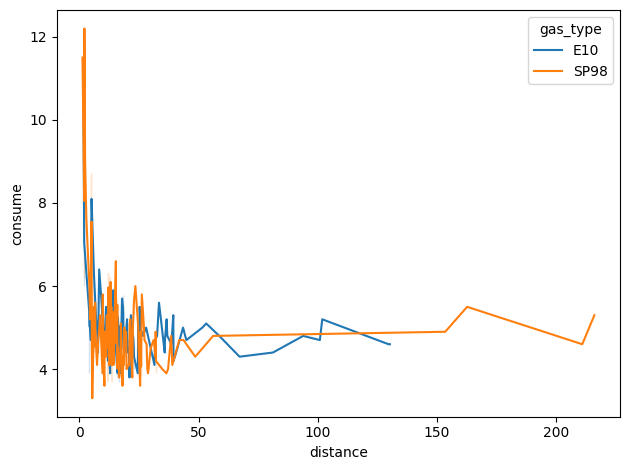

In [6]:
sns.lineplot(data, x = 'distance', y='consume', hue='gas_type')
plt.tight_layout()
plt.show()

The bigger the distance the lower the consume (L/100 km as stated on the source material), meaning that the engine is more effective in long distances and tends to consume more in short distances. This was expected and makes sense since the higher the shift and the lower the revolutions, the lower the consume of a car.

It also looks like the SP98 has a lower consume in long distances.

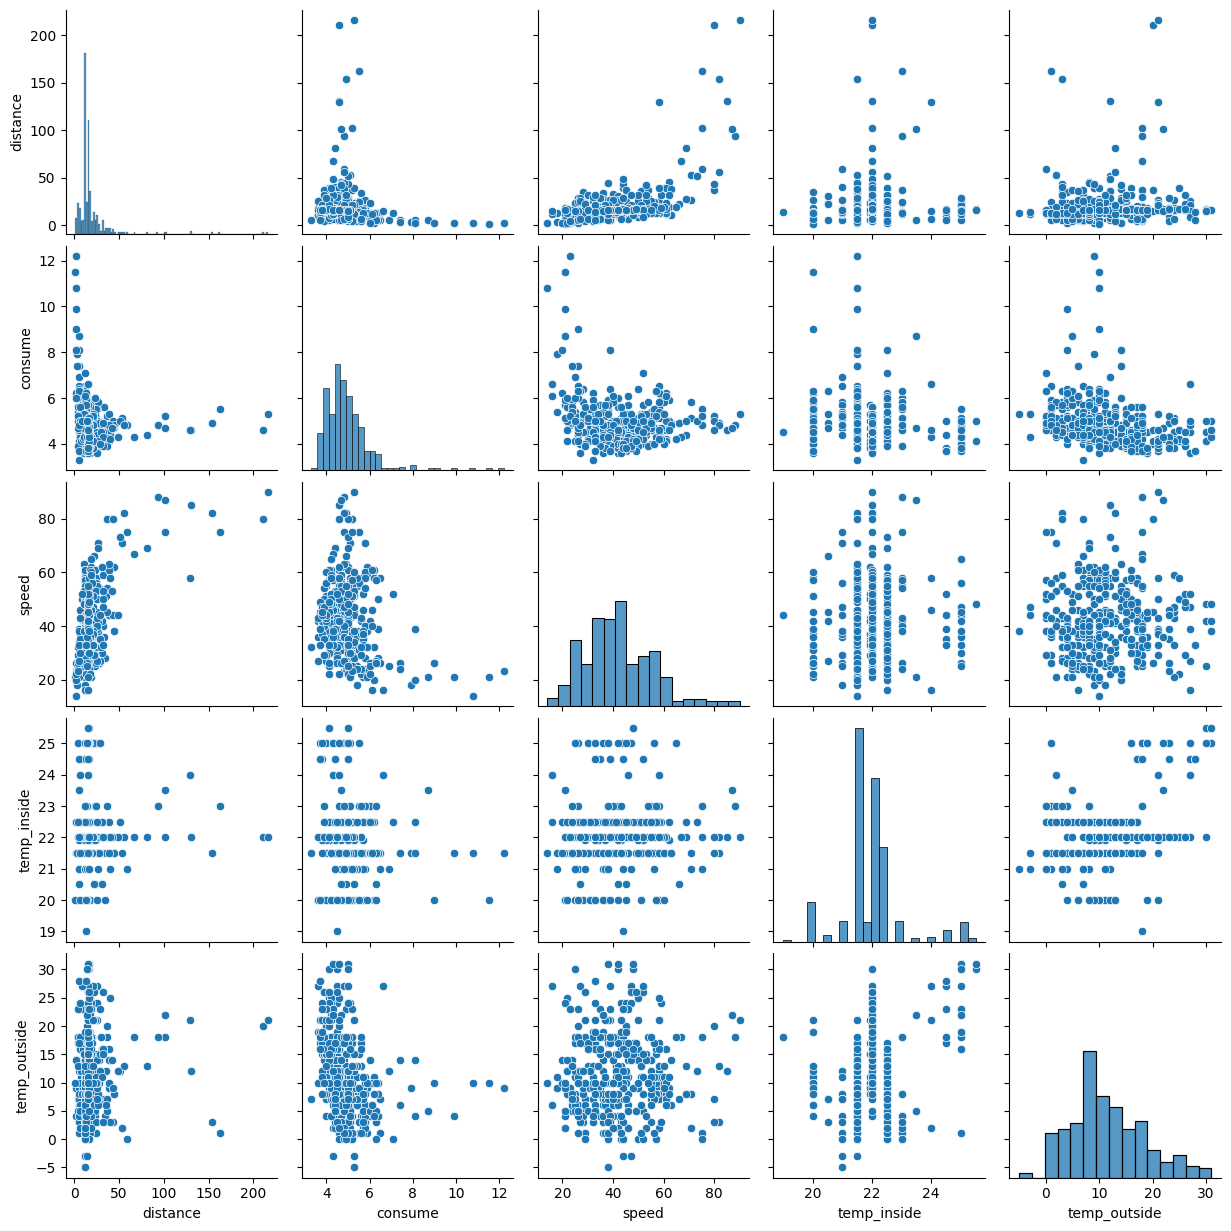

In [7]:
sns.pairplot(data[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']])
plt.show()

We will have to encode the categoricals before we move on with the correlation heatmap.

In [8]:
numericals = data.select_dtypes(np.number)
categoricals = data.select_dtypes(object)
categoricals = pd.get_dummies(categoricals, drop_first=True)
df = pd.concat([numericals, categoricals], axis=1)

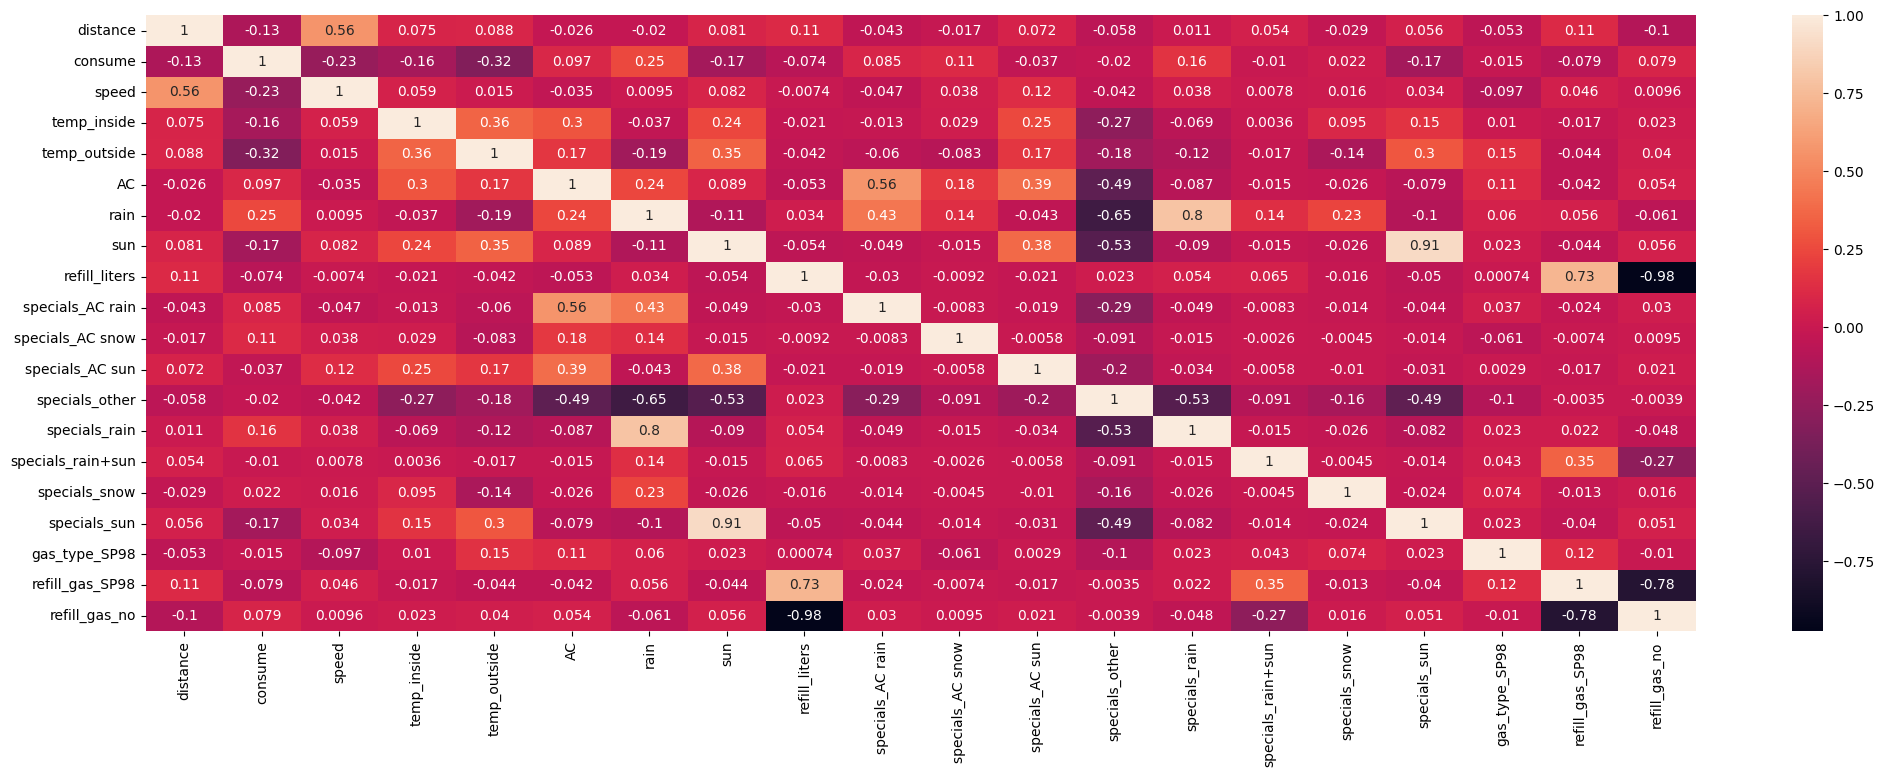

In [9]:
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df.corr(), annot=True, ax = ax)
plt.show()

As expected, we have a negative slight correlation between consume and distance. Also between speed and distance - indicating that on high speeds and lower revolutions the engine consumption is lower.

Also, the presence of rain increases the consume slightly. Also, outside and inside temperatures are naturally impacted by the presence of sun.

In [10]:
df.to_csv(config['data']+'data_models.csv', index=False)

# This concludes the exploration. Switch to the Models notebook for regression models.